In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from numpy.polynomial.polynomial import Polynomial

# Load the data
dataframe = r"C:\Users\bongo\OneDrive\Desktop\Phenolic compound\Total phenolics.xlsx"
df = pd.read_excel(dataframe)

# Extract the X and y data
X = df.iloc[:, 602:].values  # Ensure it's a NumPy array
y = df.iloc[:, 1].values

In [22]:
# Apply Savitzky-Golay filter
X_filtered = savgol_filter(X, window_length=3, polyorder=2, axis=0)

# Continuum removal using polynomial fitting
def continuum_removal(data):
    continuum = np.zeros_like(data)
    for i in range(data.shape[1]):  # Loop through each spectral feature
        x = np.arange(data.shape[0])
        # Fit a polynomial of degree 3 (or adjust as necessary)
        p = Polynomial.fit(x, data[:, i], 3)
        continuum[:, i] = p(x)
    return data / continuum  # Divide original data by the continuum

# Perform continuum removal
X_continuum_removed = continuum_removal(X_filtered)

# Split the data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_continuum_removed, y, test_size=0.3, random_state=0)

# Train the Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor

rfc = RandomForestRegressor(n_estimators=100, random_state=45)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

# Calculate and print the evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluation Metrics:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Evaluation Metrics:
Mean Squared Error: 240.37
R-squared: 0.82


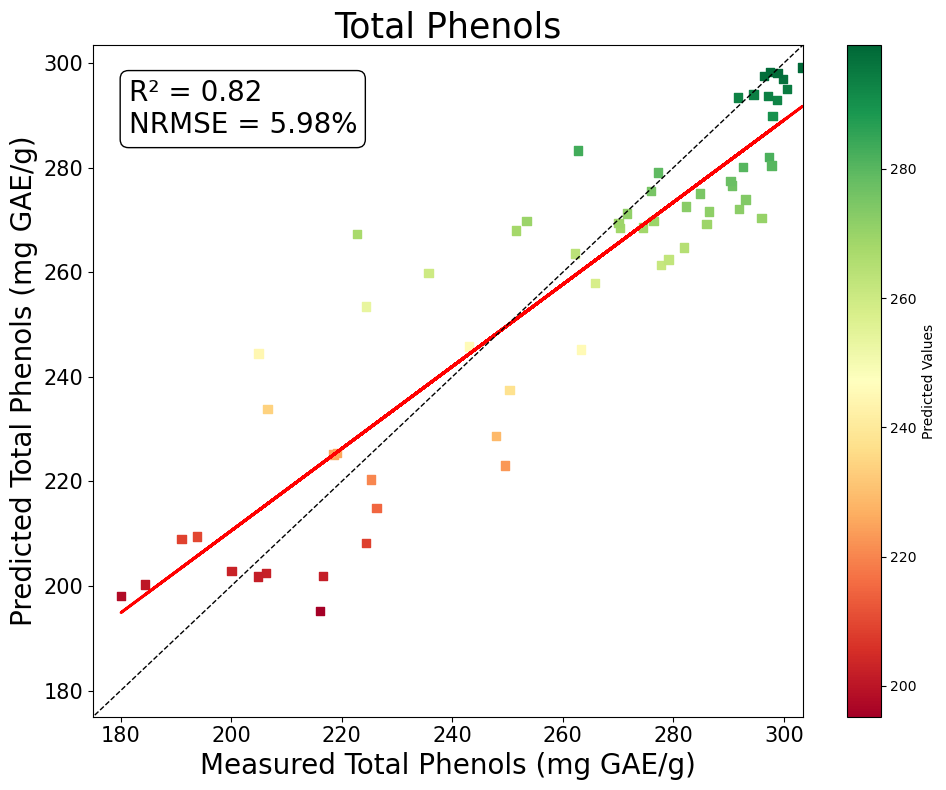

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

# Assuming y_test and y_pred are your actual and predicted values for total phenols
# Calculate R-squared and NRMSE
r2 = r2_score(y_test, y_pred)
nrmse = np.sqrt(mean_squared_error(y_test, y_pred)) / np.mean(y_test) * 100  # NRMSE calculation

# Fit a linear regression model for the regression line
model = LinearRegression()
model.fit(y_test.reshape(-1, 1), y_pred)  # Ensure y_test is reshaped properly
a = model.coef_[0]
b = model.intercept_

# Create the scatter plot with graduated colors
plt.figure(figsize=(10, 8))
scatter = plt.scatter(y_test, y_pred, c=y_pred, cmap='RdYlGn', marker='s', label='Data Points')

# Plot the linear regression line
plt.plot(y_test, a * y_test + b, color='red', linestyle='-', linewidth=2, label='Regression Line')

# Add the 1:1 line
max_val = max(y_test.max(), y_pred.max())
plt.plot([0, max_val], [0, max_val], color='black', linestyle='--', linewidth=1, label='1:1 Line')

# Add labels and title
plt.xlabel('Measured Total Phenols (mg GAE/g)', fontsize=20)
plt.ylabel('Predicted Total Phenols (mg GAE/g)', fontsize=20)
plt.title('Total Phenols', fontsize=25)
plt.grid(False)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.colorbar(scatter, label='Predicted Values')

# Add R² and NRMSE (%) information
text = f'R² = {r2:.2f}\nNRMSE = {nrmse:.2f}%'
plt.text(0.05, 0.95, text, transform=plt.gca().transAxes, fontsize=20, verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

plt.tight_layout()
plt.xlim(175, max_val)  # Adjust limits as necessary
plt.ylim(175, max_val)  # Adjust limits as necessary
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


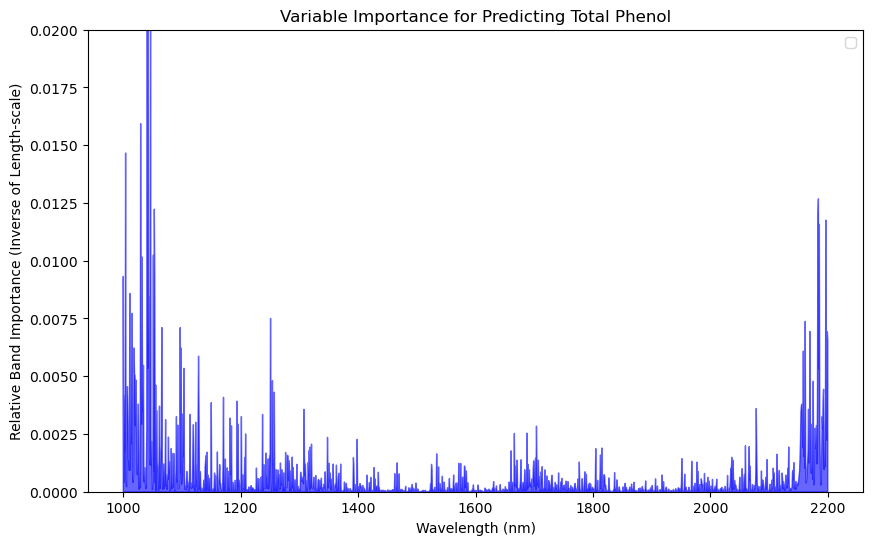

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from scipy.signal import savgol_filter
from numpy.polynomial.polynomial import Polynomial

# Load the data
dataframe = r"C:\Users\bongo\OneDrive\Desktop\Phenolic compound\Copy of Edited phenolics.xlsx"
df = pd.read_excel(dataframe)

# Extract the X and y data
X = df.iloc[:, 605:].values  # Ensure it's a NumPy array
y = df.iloc[:, 1].values

# Apply Savitzky-Golay filter
X_filtered = savgol_filter(X, window_length=15, polyorder=2, axis=0)

# Continuum removal
def continuum_removal(data):
    continuum = np.zeros_like(data)
    for i in range(data.shape[1]):
        x = np.arange(data.shape[0])
        p = Polynomial.fit(x, data[:, i], 3)
        continuum[:, i] = p(x)
    return data / continuum

X_continuum_removed = continuum_removal(X_filtered)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_continuum_removed, y, test_size=0.3, random_state=1)

# Train the Random Forest Regressor model
rfc = RandomForestRegressor(n_estimators=100, random_state=1)
rfc.fit(X_train, y_train)

# Extract feature importances
importances = rfc.feature_importances_

# Define the wavelength values (assuming each feature corresponds to a wavelength)
wavelengths = np.linspace(1000, 2200, X.shape[1])

# Create the plot
plt.figure(figsize=(10, 6))
plt.fill_between(wavelengths, importances, color='blue', alpha=0.6)

# Adjust the Y-axis
plt.title('Variable Importance for Predicting Total Phenol')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Relative Band Importance (Inverse of Length-scale)')

# Set Y-axis limits to ensure it stops at 0.04
plt.ylim(0, 0.02)  # Set upper limit to 0.04

plt.legend()
plt.grid(False)
plt.show()